# MODELE EPIDEMIOLOGICZNE

# Wstęp

jakies gadanie

# Podstawy teoretyczne



## Wprowadzenie do modelu SI:

Model SI (Susceptible-Infected) jest podstawowym modelem epidemiologicznym wykorzystywanym do opisu rozprzestrzeniania się chorób zakaźnych w populacji. Zakłada on dwie podstawowe grupy: osoby podatne na zakażenie (S) oraz osoby zakażone (I). Osoby zakażone mogą przekazywać chorobę innym, co prowadzi do wzrostu liczby zakażonych w populacji, podczas gdy liczba osób podatnych maleje, ponieważ część z nich przechodzi do kategorii zakażonych.

Model ten jest stosunkowo prosty i skuteczny w analizie wczesnych etapów epidemii, gdy nie uwzględniamy jeszcze osób wyleczonych, zmarłych, ani innych czynników, które mogą wpływać na dynamikę choroby. Model SI jest szczególnie użyteczny do prognozowania, jak szybko będzie rosła liczba zakażonych w populacji, szczególnie w fazie wzrostu epidemii.


## Opis symulacji:
W naszej symulacji przyjęliśmy populację 37,9 miliona osób (n), bazując na danych o liczbie zakażonych w Polsce w marcu i kwietniu 2020 roku. Model SI wykorzystuje dane o liczbie zakażonych w poszczególnych dniach epidemii. Wartość współczynnika transmisji **β**, kluczowego dla określenia tempa rozprzestrzeniania się choroby, obliczyliśmy bezpośrednio na podstawie dostępnych danych o liczbie zakażonych. 

Aby oszacować wartość **β**, wykorzystaliśmy równanie różniczkowe modelu SI:  

$$
\frac{dI}{dt} = \beta \cdot I(t) \cdot S(t) / N
$$

gdzie:
\begin{equation}
\begin{aligned}
\frac{dI}{dt} &\text{ to przyrost liczby zakażonych w danym dniu,} \\
I(t) &\text{ to liczba zakażonych w dniu } t, \\
S(t) &= N - I(t) \text{ to liczba osób podatnych na zakażenie,} \\
N &\text{ to całkowita liczba osób w populacji.}
\end{aligned}
\end{equation}

Na podstawie obserwowanego przyrostu zakażonych między kolejnymi dniami, rozwiązaliśmy to równanie numerycznie, wykorzystując dane z poszczególnych dni epidemii. Współczynnik **β** oszacowaliśmy, porównując obliczone wartości przyrostu zakażonych z rzeczywistymi danymi, a następnie dopasowując go tak, aby jak najlepiej pasował do obserwowanych danych.


wykres modelu SI

## MODEL SIR

jakies gadanie

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

# Parametry początkowe
n = 37_900_000  # Populacja
S0 = n - 1  # Liczba osób podatnych (cała populacja z wyjątkiem jednej osoby zakażonej)
I0 = 1  # Liczba początkowych zakażonych
R0 = 0  # Liczba początkowych wyleczonych

# Dane: dni i liczba zakażonych
dates = ['04.03.2020', '05.03.2020', '06.03.2020', '07.03.2020', '08.03.2020', '09.03.2020',
         '10.03.2020', '11.03.2020', '12.03.2020', '13.03.2020', '14.03.2020', '15.03.2020',
         '16.03.2020', '17.03.2020', '18.03.2020', '19.03.2020', '20.03.2020', '21.03.2020', '22.03.2020', '23.03.2020', '24.03.2020', '25.03.2020', '26.03.2020',
         '27.03.2020', '28.03.2020', '29.03.2020', '30.03.2020', '31.03.2020', '01.04.2020',
         '02.04.2020', '03.04.2020', '04.04.2020', '05.04.2020', '06.04.2020', '07.04.2020', '08.04.2020']

# Dane zakażonych w rzeczywistości (szacowane)
infected_data = [1, 1, 3, 6, 11, 17, 22, 31, 51, 68, 104, 125, 177, 238, 287, 355, 425, 536, 634, 749, 901, 1051, 1221, 1389, 1638, 1862, 2055, 2311, 2554,
                 2946, 3383, 3627, 4102, 4413, 4848, 5205]  # Dane o liczbie zakażonych

# Dane o liczbie wyzdrowiałych
recovery_data = [0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 3, 4, 5, 5, 5, 5, 5, 7, 8,
                 10, 14, 16, 16, 18, 22, 31, 33, 43, 57, 71, 195, 228, 269, 320, 381]  # Dane o liczbie wyzdrowiałych

# Funkcja do aktualizacji wykresu
def update(beta, gamma):
    # Symulacja numeryczna metodą Eulera
    t_max = len(dates)
    S = np.zeros(t_max)
    I = np.zeros(t_max)
    R = np.zeros(t_max)
    S[0] = S0
    I[0] = I0
    R[0] = R0

    dt = 1  # Krok czasowy
    for t in range(1, t_max):
        dS = -beta * S[t-1] * I[t-1] * dt / n
        dI = beta * S[t-1] * I[t-1] * dt / n - gamma * I[t-1] * dt
        dR = gamma * I[t-1] * dt
        S[t] = S[t-1] + dS
        I[t] = I[t-1] + dI
        R[t] = R[t-1] + dR

    # Rysowanie wykresu
    plt.figure(figsize=(10, 6))
    plt.plot(range(t_max), infected_data, 'o', label='Dane rzeczywiste (Zakażeni)', color='red')
    plt.plot(range(t_max), recovery_data, 's', label='Dane rzeczywiste (Wyzdrowiali)', color='green')
    plt.plot(range(t_max), I, label=f'Symulacja (Zakażeni) - beta = {beta:.2f}, gamma = {gamma:.2f}', linestyle='--', color='blue')
    plt.plot(range(t_max), R, label=f'Symulacja (Wyzdrowiali) - beta = {beta:.2f}, gamma = {gamma:.2f}', linestyle='--', color='orange')

    plt.xticks(range(t_max), dates, rotation=45)
    plt.xlabel('Data')
    plt.ylabel('Liczba osób')
    plt.title('Symulacja rozwoju epidemii - Model SIR')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Odświeżenie wykresu
    plt.show()

# Interaktywne suwaki
interact(update, beta=(0.0, 1.0, 0.01), gamma=(0.0, 1.0, 0.01))

interactive(children=(FloatSlider(value=0.5, description='beta', max=1.0, step=0.01), FloatSlider(value=0.5, d…

<function __main__.update(beta, gamma)>

# Wyniki i analiza danych

## beta i gamma 

POTRZEBNE NAM DO CZEGOS TAM WUEC WYLICZAMY SOBIE NA POCZTAKU BY SIE NIE POWTARZAC 

In [93]:
import numpy as np

# Parametry
n = 37_900_000  # Populacja
dates = ['04.03.2020', '05.03.2020', '06.03.2020', '07.03.2020', '08.03.2020', '09.03.2020',
         '10.03.2020', '11.03.2020', '12.03.2020', '13.03.2020', '14.03.2020', '15.03.2020',
         '16.03.2020', '17.03.2020', '18.03.2020', '19.03.2020', '20.03.2020', '21.03.2020', 
         '22.03.2020', '23.03.2020', '24.03.2020', '25.03.2020', '26.03.2020', '27.03.2020', 
         '28.03.2020', '29.03.2020', '30.03.2020', '31.03.2020', '01.04.2020', '02.04.2020', 
         '03.04.2020', '04.04.2020', '05.04.2020', '06.04.2020', '07.04.2020', '08.04.2020']
infected_data = [1, 1, 3, 6, 11, 17, 22, 31, 51, 68, 104, 125, 177, 238, 287, 355, 425, 536, 
                 634, 749, 901, 1051, 1221, 1389, 1638, 1862, 2055, 2311, 2554, 2946, 3383, 
                 3627, 4102, 4413, 4848, 5205]
recovery_data = [0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 3, 4, 5, 5, 5, 5, 5, 7, 8,
                 10, 14, 16, 16, 18, 22, 31, 33, 43, 57, 71, 195, 228, 269, 320, 381]
# Obliczenia oszacowania beta
beta_values = []
for t in range(1, len(infected_data)):
    # Liczba osób zakażonych w dniu t-1 i t
    I_t_minus_1 = infected_data[t - 1]
    I_t = infected_data[t]
    
    # Zakładamy, że liczba osób podatnych S = N - I
    S_t_minus_1 = n - I_t_minus_1
    
    # Obliczenie przyrostu zakażonych
    dI = I_t - I_t_minus_1
    
    # Oszacowanie beta
    beta = (dI * n) / (I_t_minus_1 * S_t_minus_1)
    beta_values.append(beta)
    
gamma_values = []
for t in range(1, len(infected_data)):
    # Zmiany w liczbie zakażonych i wyzdrowiałych
    delta_R = recovery_data[t] - recovery_data[t-1]
    delta_I = infected_data[t] - infected_data[t-1]
    
    if delta_I > 0:  # Unikamy dzielenia przez 0
        gamma = delta_R / delta_I
        gamma_values.append(gamma)

# Średnia wartość beta z obliczeń
beta_avg = np.mean(beta_values)
gamma_average = np.mean(gamma_values)
print(f'Wyestymowana średnia wartość gamma: {gamma_average:.4f}')
print(f"Średnia wartość beta: {beta_avg:.4f}")

Wyestymowana średnia wartość gamma: 0.0423
Średnia wartość beta: 0.3111


## Metoda Eulera

jakies gadanie o metodzie

## MODEL SI

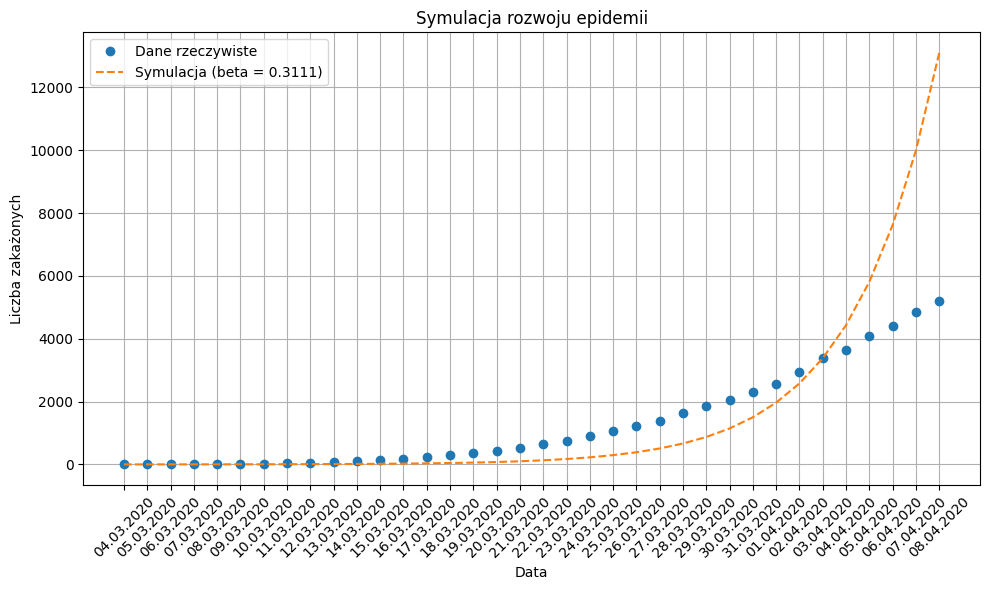

In [94]:
# Parametry początkowe
n = 37_900_000  # Populacja
S0 = n - 1  # Liczba osób podatnych (cała populacja z wyjąciem jednej osoby zakażonej)
I0 = 1  # Liczba początkowych zakażonych
beta = 0.3111  # Współczynnik transmisji (szacowany na podstawie danych)

# Dane: dni i liczba zakażonych
dates = ['04.03.2020', '05.03.2020', '06.03.2020', '07.03.2020', '08.03.2020', '09.03.2020',
         '10.03.2020', '11.03.2020', '12.03.2020', '13.03.2020', '14.03.2020', '15.03.2020',
         '16.03.2020', '17.03.2020', '18.03.2020', '19.03.2020', '20.03.2020', '21.03.2020', '22.03.2020', '23.03.2020', '24.03.2020', '25.03.2020', '26.03.2020', 
         '27.03.2020', '28.03.2020', '29.03.2020', '30.03.2020', '31.03.2020', '01.04.2020',
         '02.04.2020', '03.04.2020', '04.04.2020', '05.04.2020', '06.04.2020', '07.04.2020', '08.04.2020']
infected_data = [1, 1, 3, 6, 11, 17, 22, 31, 51, 68, 104, 125, 177, 238, 287, 355, 425, 536, 634, 749, 901, 1051, 1221, 1389, 1638, 1862, 2055, 2311, 2554, 
                 2946, 3383, 3627, 4102, 4413, 4848, 5205]  # Dane o liczbie zakażonych  # Dane zakażonych

# Symulacja numeryczna metodą Eulera
t_max = len(dates)  # Ilość dni
I = np.zeros(t_max)
S = np.zeros(t_max)
I[0] = I0
S[0] = S0

# Krok czasowy
dt = 1

# Rozwiązanie równania metodą Eulera
for t in range(1, t_max):
    dI = beta * I[t-1] * S[t-1] * dt / n
    I[t] = I[t-1] + dI
    S[t] = S[t-1] - dI

# Porównanie z danymi
plt.figure(figsize=(10, 6))
plt.plot(range(t_max), infected_data, 'o', label='Dane rzeczywiste')
plt.plot(range(t_max), I, label=f'Symulacja (beta = {beta})', linestyle='--')
plt.xticks(range(t_max), dates, rotation=45)
plt.xlabel('Data')
plt.ylabel('Liczba zakażonych')
plt.title('Symulacja rozwoju epidemii')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




## MODEL SIR

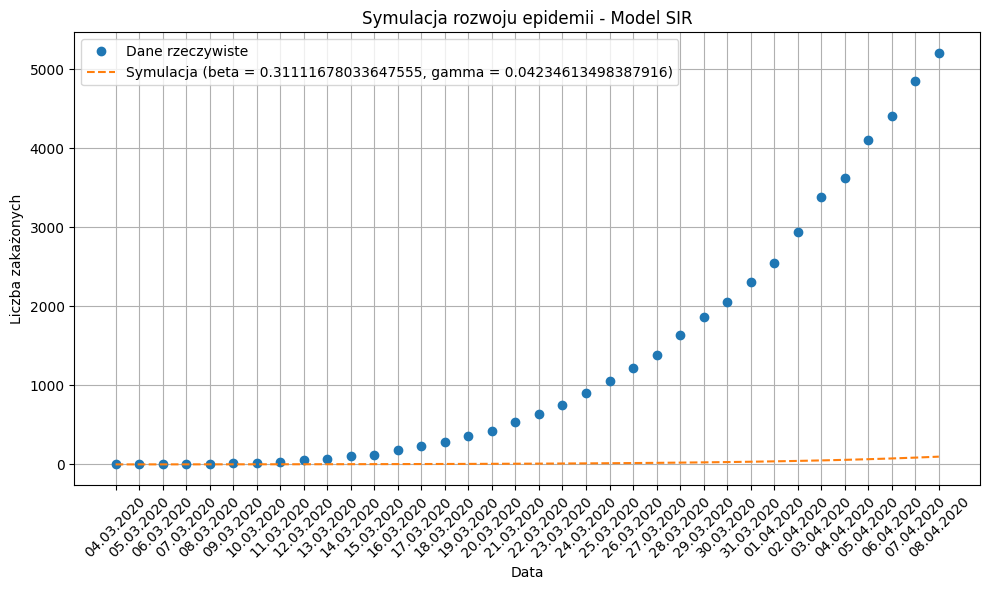

In [95]:
# Symulacja numeryczna metodą Eulera
t_max = len(dates)  # Ilość dni
S = np.zeros(t_max)
I = np.zeros(t_max)
R = np.zeros(t_max)
S[0] = S0
I[0] = I0
R[0] = R0

# Krok czasowy
dt = 1

# Rozwiązanie równania metodą Eulera
for t in range(1, t_max):
    dS = -beta * S[t-1] * I[t-1] * dt / n
    dI = beta * S[t-1] * I[t-1] * dt / n - gamma * I[t-1] * dt
    dR = gamma * I[t-1] * dt
    S[t] = S[t-1] + dS
    I[t] = I[t-1] + dI
    R[t] = R[t-1] + dR

# Porównanie z danymi
plt.figure(figsize=(10, 6))
plt.plot(range(t_max), infected_data, 'o', label='Dane rzeczywiste')
plt.plot(range(t_max), I, label=f'Symulacja (beta = {beta_avg}, gamma = {gamma_average})', linestyle='--')
plt.xticks(range(t_max), dates, rotation=45)
plt.xlabel('Data')
plt.ylabel('Liczba zakażonych')
plt.title('Symulacja rozwoju epidemii - Model SIR')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Wyniki modelowania przy użyciu metody Eulera dla SI i SIR

W naszej symulacji przyjęliśmy populację 37,9 miliona osób (n), bazując na danych o liczbie zakażonych w Polsce w marcu i kwietniu 2020 roku. Model SI wykorzystuje dane o liczbie zakażonych na poszczególnych dniach epidemii, a współczynnik \( \beta \) jest kluczowy dla określenia tempa rozprzestrzeniania się choroby. 

W naszym przypadku przyjęliśmy wartość \( \beta = 0.3 \). Współczynnik ten jest obliczany na podstawie dynamiki epidemii oraz zależności między liczbą zakażonych \( I(t) \) a liczbą osób podatnych \( S(t) \). Wartość \( \beta \) została oszacowana na podstawie danych dostępnych na początku epidemii i założenia, że liczba zakażonych będzie wzrastać w zależności od liczby osób podatnych oraz tempa transmisji.

Zastosowaliśmy metodę Eulera do numerycznego rozwiązania równania różniczkowego opisującego zmiany w liczbie zakażonych w czasie. Równanie, które opisuje ten proces, ma postać:

\[
\frac{dI}{dt} = \beta \cdot I(t) \cdot S(t) / N
\]

gdzie:
- \( \frac{dI}{dt} \) to przyrost liczby zakażonych w danym dniu,
- \( I(t) \) to liczba zakażonych w dniu \( t \),
- \( S(t) = N - I(t) \) to liczba osób podatnych na zakażenie,
- \( N \) to całkowita liczba osób w populacji.

Symulacja została przeprowadzona dla 35 dni, na podstawie danych o liczbie zakażonych w Polsce w marcu i kwietniu 2020 roku. Otrzymane wyniki przedstawiają rozwój epidemii w czasie oraz porównanie modelu z rzeczywistymi danymi.

Wartości przewidywane przez model zostały porównane z rzeczywistymi danymi o liczbie zakażonych, co pozwoliło na ocenę skuteczności modelu w prognozowaniu tempa rozprzestrzeniania się epidemii.

**Wyniki symulacji:**

Na podstawie danych, model wykazał zgodność z rzeczywistymi danymi w początkowych etapach epidemii. Liczba zakażonych rosła zgodnie z przewidywaniami modelu, jednak dalszy rozwój epidemii wymagałby uwzględnienia dodatkowych czynników, takich jak wprowadzenie działań zapobiegawczych, leczenie oraz zmiana w liczbie osób podatnych na zakażenie.


## Metoda Runge-Kutta rzędu 4 (RK4)

jakies gadanie o metodzie

## MODEL SI

Żeby obliczyc model SI numerycznie przyjmiemy zapis gdzie:
$$\frac{dy}{dt} = F(t, y)$$
oraz
$${y}=
\begin{bmatrix}
S\left(t\right) \\
I\left(t\right)
\end{bmatrix},
~~{F(t,y)}=\begin{bmatrix}
f\left(t,S,I\right) \\
g\left(t,S,I\right) 
\end{bmatrix}

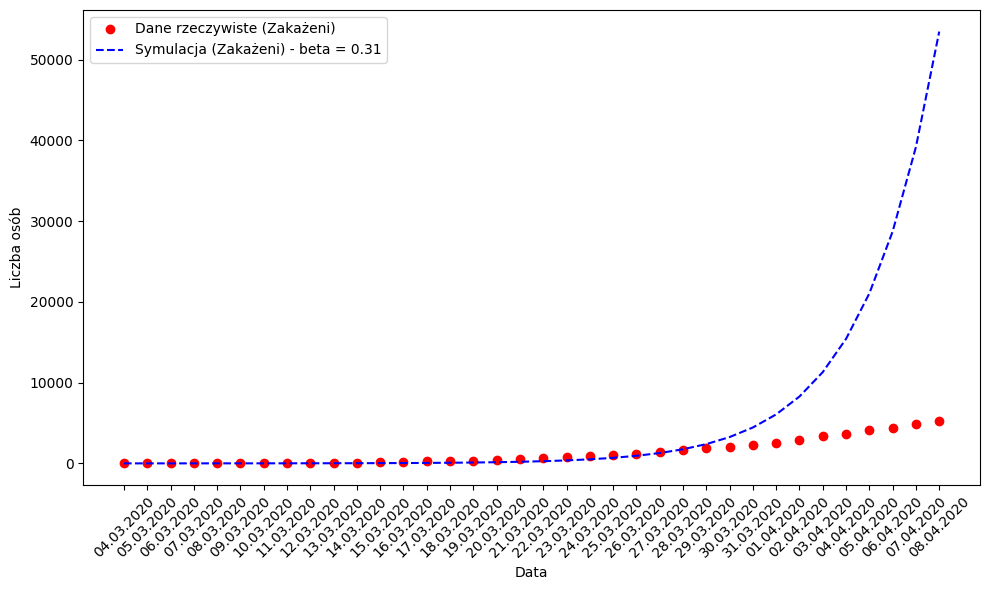

In [96]:
# Funkcja dla modelu SI
def f(S, I, beta, N):
    return -beta * S * I / N

def g(S, I, beta, N):
    return beta * S * I / N

# RK4 dla modelu SI
def rk4_step(S, I, beta, N, h):
    k1_S = f(S, I, beta, N)
    k1_I = g(S, I, beta, N)
    
    k2_S = f(S + h * k1_S / 2, I + h * k1_I / 2, beta, N)
    k2_I = g(S + h * k1_S / 2, I + h * k1_I / 2, beta, N)
    
    k3_S = f(S + h * k2_S / 2, I + h * k2_I / 2, beta, N)
    k3_I = g(S + h * k2_S / 2, I + h * k2_I / 2, beta, N)
    
    k4_S = f(S + h * k3_S, I + h * k3_I, beta, N)
    k4_I = g(S + h * k3_S, I + h * k3_I, beta, N)
    
    # Klasyczna aktualizacja wartości
    S_new = S + h / 6 * (k1_S + 2 * k2_S + 2 * k3_S + k4_S)
    I_new = I + h / 6 * (k1_I + 2 * k2_I + 2 * k3_I + k4_I)
    
    return S_new, I_new

# Warunki początkowe
S, I = n - infected_data[0], infected_data[0]
h = 1  # Krok czasowy (1 dzień)
S_vals, I_vals = [S], [I]

# Symulacja RK4
for t in range(1, len(dates)):
    S, I = rk4_step(S, I, beta_avg, n, h)
    S_vals.append(S)
    I_vals.append(I)

# Wykresy
plt.figure(figsize=(10, 6))
plt.plot(dates, infected_data, 'o', label='Dane rzeczywiste (Zakażeni)', color='red')
plt.plot(dates, I_vals, label=f'Symulacja (Zakażeni) - beta = {beta_avg:.2f}', linestyle='--', color='blue')
plt.xticks(rotation=45)
plt.xlabel("Data")
plt.ylabel("Liczba osób")
plt.legend()
plt.tight_layout()
plt.show()

## MODEL SIR
Żeby obliczyc model SIR numerycznie przyjmiemy zapis gdzie:
$$\frac{dy}{dt} = F(t, y)$$
oraz
$${y}=
\begin{bmatrix}
S\left(t\right) \\
I\left(t\right) \\
R\left(t\right)
\end{bmatrix},
~~{F(t,y)}=\begin{bmatrix}
f\left(t,S,I,R\right) \\
g\left(t,S,I,R\right) \\
j\left(t,S,I,R\right)
\end{bmatrix}

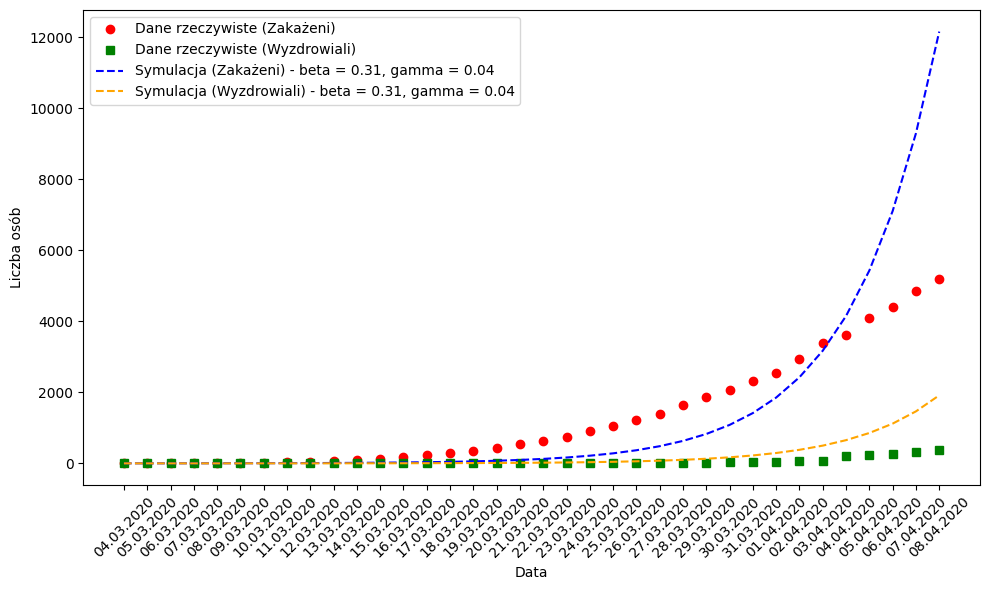

In [97]:
# Funkcje SIR
def f(S, I, R, beta):
    return -beta * S * I / n

def g(S, I, R, beta, gamma):
    return beta * S * I / n - gamma * I

def j(S, I, R, gamma):
    return gamma * I

# RK4 dla modelu SIR
def rk4_step(S, I, R, beta, gamma, h):
    k1_S = f(S, I, R, beta)
    k1_I = g(S, I, R, beta, gamma)
    k1_R = j(S, I, R, gamma)
    
    k2_S = f(S + h * k1_S / 2, I + h * k1_I / 2, R + h * k1_R / 2, beta)
    k2_I = g(S + h * k1_S / 2, I + h * k1_I / 2, R + h * k1_R / 2, beta, gamma)
    k2_R = j(S + h * k1_S / 2, I + h * k1_I / 2, R + h * k1_R / 2, gamma)
    
    k3_S = f(S + h * k2_S / 2, I + h * k2_I / 2, R + h * k2_R / 2, beta)
    k3_I = g(S + h * k2_S / 2, I + h * k2_I / 2, R + h * k2_R / 2, beta, gamma)
    k3_R = j(S + h * k2_S / 2, I + h * k2_I / 2, R + h * k2_R / 2, gamma)
    
    k4_S = f(S + h * k3_S, I + h * k3_I, R + h * k3_R, beta)
    k4_I = g(S + h * k3_S, I + h * k3_I, R + h * k3_R, beta, gamma)
    k4_R = j(S + h * k3_S, I + h * k3_I, R + h * k3_R, gamma)
    
    S_new = S + h / 6 * (k1_S + 2 * k2_S + 2 * k3_S + k4_S)
    I_new = I + h / 6 * (k1_I + 2 * k2_I + 2 * k3_I + k4_I)
    R_new = R + h / 6 * (k1_R + 2 * k2_R + 2 * k3_R + k4_R)
    
    return S_new, I_new, R_new

# Warunki początkowe
S, I, R = n - infected_data[0], infected_data[0], recovery_data[0]
h = 1  # Krok czasowy (1 dzień)
S_vals, I_vals, R_vals = [S], [I], [R]

# Symulacja RK4
for t in range(1, len(dates)):
    S, I, R = rk4_step(S, I, R, beta_avg, gamma_average, h)
    S_vals.append(S)
    I_vals.append(I)
    R_vals.append(R)

# Wykresy
plt.figure(figsize=(10, 6))
plt.plot(dates, infected_data, 'o', label='Dane rzeczywiste (Zakażeni)', color='red')
plt.plot(dates, recovery_data, 's', label='Dane rzeczywiste (Wyzdrowiali)', color='green')
plt.plot(dates, I_vals, label=f'Symulacja (Zakażeni) - beta = {beta_avg:.2f}, gamma = {gamma_average:.2f}', linestyle='--', color='blue')
plt.plot(dates, R_vals, label=f'Symulacja (Wyzdrowiali) - beta = {beta_avg:.2f}, gamma = {gamma_average:.2f}', linestyle='--', color='orange')
plt.xticks(rotation=45)
plt.xlabel("Data")
plt.ylabel("Liczba osób")
plt.legend()
plt.tight_layout()
plt.show()

## Wyniki modelowania przy użyciu metody RK4 dla SI i SIR

ble ble ble

# Podsumowanie

porownie metody EUlera i RK4 + wnioski + jak to ma sie ogolnie do SI i SIR 

# Literatura

https://www.youtube.com/watch?v=2GEzDzbMkpk&t=1098s&ab_channel=ICMUniversityofWarsaw - fajny filmik o modelowaniu epidemii uwzględnia rozwój epidemii w Polsce, konkretne miasta dużo przydatnych materiałów dobry wzór

https://sc21.icm.edu.pl/index.php/icm-epidemiological-model/ - Artykuł twórcy filmiku różne wykresy

https://www.youtube.com/watch?v=j46osLueJKc&ab_channel=FranciszekRakowski - filmik pokazujacy rozprzestrzenianie sie epidemii w Polsce (Graf)

https://kosmos.ptpk.org/index.php/Kosmos/article/download/2828/2719/5664 - wytłumaczenie modelu SIR, SEIR oraz SI

https://koronawirusunas.pl/ - wszystkie dane dotyczace koronawirusa w Polsce od poczatku epidemii

https://www.iorajournal.org/ijgor/article/view/67/73 - artykul o analizie SIR przy uzyciu metod numerycznych

https://youtu.be/ukNbG7muKho?si=aFuv6m7yGa3H3dvo - Metoda Eulera

https://foton.if.uj.edu.pl/documents/12579485/149668788/E_G-N.pdf/8f29f7de-63b5-4709-8bba-57e3461f790b - SI, SIS, SIR artykul Uniwersytetu Jagiellonskiego 

https://blog.tonytsai.name/blog/2014-11-24-rk4-method-for-solving-sir-model - uzycie rk4 na SIR